# Spam or Ham  
In this project, we explore the [**SMS Spam Collection Data Set**](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). First, we perform EDA on the dataset. Then, we train a few out-of-the-shelf machine learning models using the data.

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/home/kaveh/Documents/ML/Datasets/SMS Spam Collection/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

In [3]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We have 4825 ham and 747 spam messages.

Let's include message length as a feature.

In [5]:
df['label_code'] = df['label'].astype('category').cat.codes
df['length'] = df.message.apply(len)

In [6]:
df.head()

,label,message,label_code,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


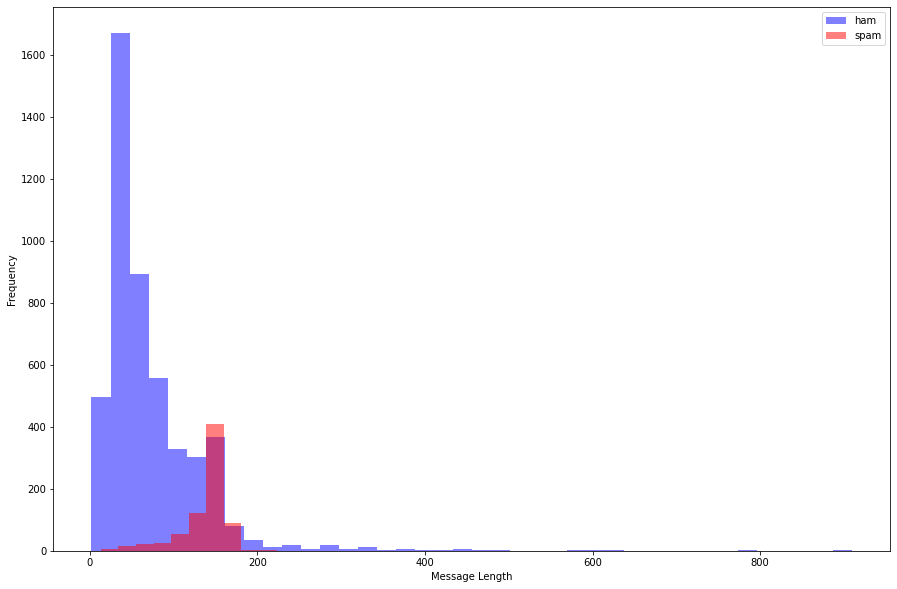

In [7]:
plt.figure(figsize=(15, 10))
df[df.label=='ham'].length.plot(bins=40, kind='hist', color='blue', alpha=0.5, label='ham')
df[df.label=='spam'].length.plot(bins=10, kind='hist', color='red', alpha=0.5, label='spam')
plt.xlabel('Message Length')
plt.legend()
plt.show()

It is clear that spam messages are generally longer than ham messages. 

We will remove punctuations and English stopwords from the message text.

In [8]:
def text_preprocessing(text_string):
    #Removing punctuations
    punc_removed = [char for char in text_string if char not in string.punctuation]
    punc_removed = ''.join(punc_removed)
    #Removing stopwords
    stop_removed = [word for word in punc_removed.split(' ') if word.lower() not in stopwords.words('english')]
    return ' '.join(stop_removed)

In [9]:
df['clean_text'] = df['message'].apply(text_preprocessing)

In [10]:
df.head()

,label,message,label_code,length,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though


We split the dataset in training and test sets. Then, we use CountVectorizer and TfidfTransformer classes to generate a Bag-of-words representation of our data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['clean_text', 'length']], df['label_code'], test_size=0.3,
                                                   random_state=42)

In [12]:
vectorizer = CountVectorizer().fit(X_train['clean_text'])

In [13]:
train_vect = vectorizer.transform(X_train['clean_text'])
test_vect = vectorizer.transform(X_test['clean_text'])

In [14]:
tfidf_transformer = TfidfTransformer().fit(train_vect)

In [15]:
train_tfidf = tfidf_transformer.transform(train_vect)
test_tfidf = tfidf_transformer.transform(test_vect)

We concatanate the message length with our bag-of-words representation and scale the features.

In [16]:
train_data = np.hstack((train_tfidf.A, X_train['length'].to_numpy()[:, None]))
test_data = np.hstack((test_tfidf.A, X_test['length'].to_numpy()[:, None]))

In [17]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

Finally, we train out-of-the-shelf models from scikit-learn package. We use five models:  
1. Multinomial Naive Bayes
2. Support Vector Machine
3. Decision Tree
4. Gradient Boosting Classifier
5. Random Forst 

We use accuracy, precision, recall, and f1_score as evaluation metrics.

In [18]:
model1 = MultinomialNB()
model1.fit(train_data, y_train)
preds = model1.predict(test_data)
print('accuracy:', accuracy_score(y_test, preds), 
      '\nprecision:', precision_score(y_test, preds), 
      '\nrecall:', recall_score(y_test, preds), 
      '\nf1_score:', f1_score(y_test, preds))

accuracy: 0.9832535885167464 
precision: 0.9414414414414415 
recall: 0.9330357142857143 
f1_score: 0.9372197309417041


In [19]:
model2 = SVC()
model2.fit(train_data, y_train)
preds = model2.predict(test_data)
print('accuracy:', accuracy_score(y_test, preds), 
      '\nprecision:', precision_score(y_test, preds), 
      '\nrecall:', recall_score(y_test, preds), 
      '\nf1_score:', f1_score(y_test, preds))

accuracy: 0.9671052631578947 
precision: 0.8894009216589862 
recall: 0.8616071428571429 
f1_score: 0.8752834467120182


In [20]:
model3 = DecisionTreeClassifier()
model3.fit(train_data, y_train)
preds = model3.predict(test_data)
print('accuracy:', accuracy_score(y_test, preds), 
      '\nprecision:', precision_score(y_test, preds), 
      '\nrecall:', recall_score(y_test, preds), 
      '\nf1_score:', f1_score(y_test, preds))

accuracy: 0.9671052631578947 
precision: 0.8894009216589862 
recall: 0.8616071428571429 
f1_score: 0.8752834467120182


In [21]:
model4 = GradientBoostingClassifier()
model4.fit(train_data, y_train)
preds = model4.predict(test_data)
print('accuracy:', accuracy_score(y_test, preds), 
      '\nprecision:', precision_score(y_test, preds), 
      '\nrecall:', recall_score(y_test, preds), 
      '\nf1_score:', f1_score(y_test, preds))

accuracy: 0.9641148325358851 
precision: 0.9361702127659575 
recall: 0.7857142857142857 
f1_score: 0.854368932038835


In [22]:
model5 = RandomForestClassifier()
model5.fit(train_data, y_train)
preds = model5.predict(test_data)
print('accuracy:', accuracy_score(y_test, preds), 
      '\nprecision:', precision_score(y_test, preds), 
      '\nrecall:', recall_score(y_test, preds), 
      '\nf1_score:', f1_score(y_test, preds))

accuracy: 0.9766746411483254 
precision: 1.0 
recall: 0.8258928571428571 
f1_score: 0.9046454767726161


Multinomial Naive Bayes has the best performance out of the box, but other algorithms might be better if fine-tuned.   



**References:**  

Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results.  Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. On the Validity of a New SMS Spam Collection.  Proceedings of the 11th IEEE International Conference on Machine Learning and Applications (ICMLA'12), Boca Raton, FL, USA, 2012. 

Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P.  Towards SMS Spam Filtering: Results under a New Dataset.   International Journal of Information Security Science (IJISS), 2(1), 1-18, 2013.